In [52]:
import numpy as np
import pandas as pd
import re
from  nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("twitter_data_stemmed.csv")

In [3]:
nan_counts = df.isna().sum()
print(nan_counts)

target               0
id                   0
date                 0
flag                 0
user                 0
text                 0
stemmed_content    495
dtype: int64


In [4]:
df['stemmed_content'].replace({np.nan: ''}, inplace=True)


In [5]:
nan_counts = df.isna().sum()
print(nan_counts)

target             0
id                 0
date               0
flag               0
user               0
text               0
stemmed_content    0
dtype: int64


In [6]:
df.shape

(1600000, 7)

In [7]:
df['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [57]:
positive_tweets = df[df['target'] == 1]
negative_tweets = df[df['target'] == 0]
positive_sample = positive_tweets.sample(n=50000, random_state=42)
negative_sample = negative_tweets.sample(n=50000, random_state=42)
latest_dataset = pd.concat([positive_sample, negative_sample])
latest_dataset = latest_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

In [58]:
X = latest_dataset['stemmed_content'].values
Y = latest_dataset['target'].values

In [59]:
print(X)
print(len(X))

['say sad say pero makakabuka lng ng pc tuw weekend pag may assign http plurk com p xw n'
 'allergi suck duck nut lt gt'
 'jordanknight u guy could stand north pole would still hot hot hot xxxx'
 ... 'dog die kidney failur like shelti'
 'melodylealamb goooood morn melodi wish wonder mother day famili'
 'sit back parent hous countri nice sometim']
100000


In [60]:
print(Y)
print(len(Y))

[0 0 1 ... 0 1 1]
100000


In [61]:
X_train , x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [62]:
print(X.shape,X_train.shape,x_test.shape)

(100000,) (80000,) (20000,)


# converting Textual data in numerical

In [63]:
vec = TfidfVectorizer()
X_train = vec.fit_transform(X_train)
x_test = vec.transform(x_test)

In [64]:
import numpy as np
from scipy.sparse import csr_matrix

class LogisticRegression_model:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []  # To store the history of the cost function

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, y_true, y_pred):
        epsilon = 1e-15  # Small value to prevent log(0)
        cost = -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
        return cost

    def gradient_descent(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Convert X to a sparse matrix if it's not already
        if not isinstance(X, csr_matrix):
            X = csr_matrix(X)

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = X.dot(self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute cost
            cost = self.cost_function(y, y_predicted)
            self.cost_history.append(cost)

            # Compute gradients
            dw = (1 / num_samples) * X.T.dot(y_predicted - y)
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = X.dot(self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)


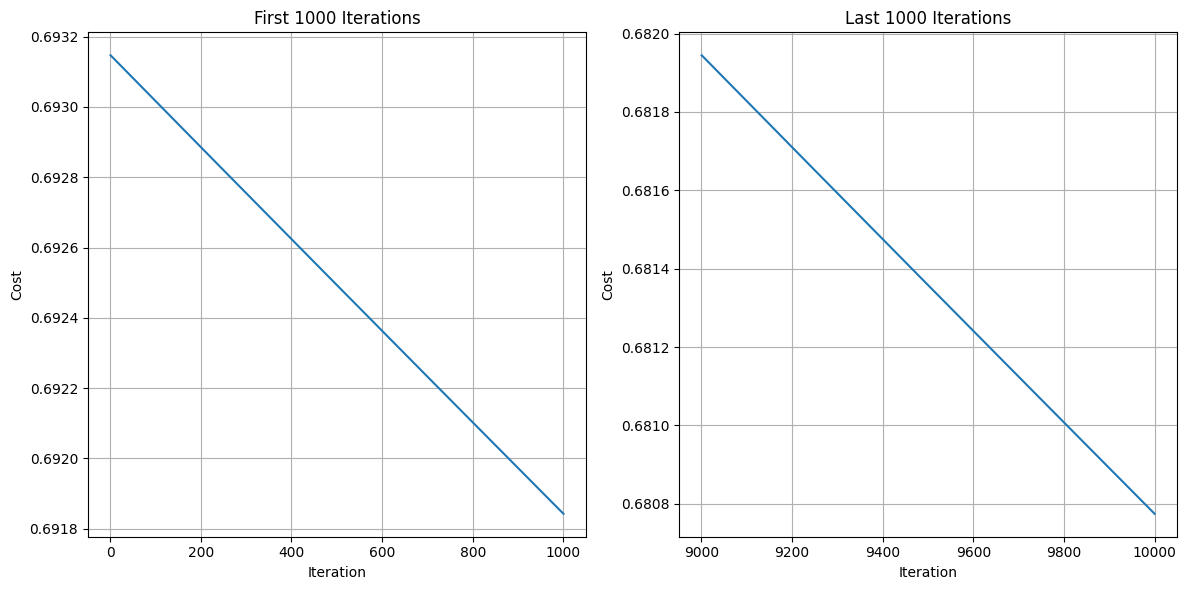

In [67]:
# Instantiate the LogisticRegression_model
model = LogisticRegression_model(learning_rate=0.01, num_iterations=10000)

# Train the model
model.gradient_descent(X_train, Y_train)
def plot_cost_vs_iteration(cost_history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots with 1 row and 2 columns

    # Plot for the first 1000 iterations
    axs[0].plot(range(1, 1001), cost_history[:1000],  linestyle='-')
    axs[0].set_title('First 1000 Iterations')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Cost')
    axs[0].grid(True)

    # Plot for the last 1000 iterations
    axs[1].plot(range(len(cost_history)-999, len(cost_history)+1), cost_history[-1000:], linestyle='-')
    axs[1].set_title('Last 1000 Iterations')
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('Cost')
    axs[1].grid(True)

    plt.tight_layout()  # Adjust layout to prevent overlap of subplots
    plt.show()

# Call the function to plot cost vs. iteration
plot_cost_vs_iteration(model.cost_history)

In [71]:
y_hat = model.predict(X_train)
count = 0
m = len(y_hat)
for i in range(m):
    if y_hat[i] != Y_train[i]:
        count += 1

accuracy = ((m - count) / m) * 100
print("Accuracy of your model is:", accuracy)


Accuracy of your model is: 71.79625
